In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tifffile

data_path = Path("../scripts/data/csv_files")
save_path = Path("./output")
dfs = [pd.read_csv(f) for f in data_path.glob("*.csv")]

df = dfs[0]
from figure_utils import numpify_df, basic_event_iterator, collapse_2d

In [7]:
from eventcamprocessing.particle_detection import ev_particlefinder
from eventcamprocessing.particle_tracking import ev_particletracker

events = numpify_df(df)
shape = (720, 1280)

t_step = 20000
t_window = 10000

all_particles = []

for i, window_events in enumerate(basic_event_iterator(events, t_step, t_window)):
    window_events = window_events[window_events["p"] == 1]

    particles = ev_particlefinder(
        window_events,
        25,
        shape[0],
        shape[1]
    )

    all_particles.extend(particles)

Found 1 particles at t = 0.00486 s.
Found 1 particles at t = 0.00682 s.
Found 1 particles at t = 0.00879 s.
Found 1 particles at t = 0.01079 s.
Found 2 particles at t = 0.01284 s.
Found 2 particles at t = 0.01486 s.
Found 2 particles at t = 0.01682 s.
Found 3 particles at t = 0.01881 s.
Found 5 particles at t = 0.02078 s.
Found 4 particles at t = 0.02279 s.
Found 5 particles at t = 0.02479 s.
Found 5 particles at t = 0.02686 s.
Found 5 particles at t = 0.02879 s.
Found 5 particles at t = 0.03078 s.
Found 5 particles at t = 0.03283 s.
Found 6 particles at t = 0.03478 s.
Found 6 particles at t = 0.0368 s.
Found 6 particles at t = 0.0388 s.
Found 5 particles at t = 0.04076 s.
Found 6 particles at t = 0.04281 s.
Found 6 particles at t = 0.04478 s.
Found 7 particles at t = 0.04676 s.
Found 5 particles at t = 0.04883 s.
Found 7 particles at t = 0.05078 s.
Found 6 particles at t = 0.0528 s.
Found 7 particles at t = 0.05481 s.
Found 6 particles at t = 0.05681 s.
Found 7 particles at t = 0.0588

In [9]:
dtype = np.dtype([("x", "f4"), ("y", "f4"), ("t", "f8"), ("area", "i4")])
all_particles = np.array(
    all_particles, dtype=dtype
)

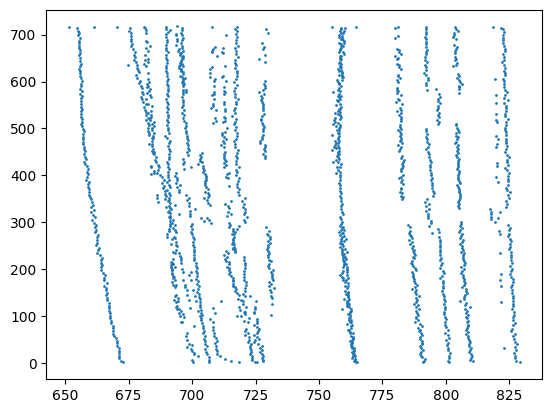

In [11]:
plt.scatter(all_particles["x"], all_particles["y"], s=1)
plt.show()

In [12]:
len(events)

2483916